# Heart Attack Analysis & Prediction Dataset
A dataset for heart attack classification

source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### Steps

1. Import dependencies
2. Data Loading
3. Data Inspection - Data Visualization
4. Data Cleaning - check for NaN , outliers , anomalies
5. Data Preprocessing - normalization
6. Model selection - 
7. Model Training
8. Model Evaluation

# 1.0 Import dependencies

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 2.0 Data Loading

In [2]:
#data loading
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



##  2.1 Variable description
    Age : Age of the patient

    Sex : Sex of the patient

    exang: exercise induced angina (1 = yes; 0 = no)

    ca: number of major vessels (0-3)

    cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic

    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach : maximum heart rate achieved

    target : 0= less chance of heart attack 1= more chance of heart attack


# 3.0 Data Inspection

## 3.1 Brief Summary of the data

In [3]:
#data inspection
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 3.2 Total columns and rows of the data and also the data type of each columns

In [4]:
heart_df.info()
# can see there non-null count is not the same so will drop it later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 3.3 Unique Data for each Columns

This will help detect anomalies such as in sex, ca and most categorical features


In [5]:
heart_df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

anomaly in ca and thall

# 4.0 Data Cleaning

## 4.1 Dropping NaN

In [6]:
# Data Cleaning - check for NaN , outliers , anomalies

#checknan
missing_data = heart_df.isna().sum()
print(missing_data)




age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


## 4.2 Dealing with anomaly at cl and thall

In [7]:
# 1. Drop
heart_df.drop(heart_df.query('thall ==0 or caa ==4').index, axis = 0, inplace = True)

In [8]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
cp,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
trtbps,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
chol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
fbs,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
restecg,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
thalachh,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
exng,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
oldpeak,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


In [9]:
# 2. Interpolate (Fill with mode and median)
# categorical data = fill with mode
# for i in cat:
#     heart_df[i] = heart_df[i].fillna(heart_df[i].mode())

# # continuous data = median
# for i in con:
#     heart_df[i] = heart_df[i].fillna(heart_df[i].median())


## 4.3 Detect duplicate and drop it

In [10]:
# Dropping duplicates
heart_df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 5.0 Data Preprocessing

## 5.1 Finding the correlation and correlation between features and target

by the help of Cramers Function

In [11]:
#Cramers Function

def cramers_corrected_stat(confusion_matrix):

    """ calculate Cramers V statistic for categorial-categorial association.

        uses correction from Bergsma and Wicher,

        Journal of the Korean Statistical Society 42 (2013): 323-328

    """

    chi2 = ss.chi2_contingency(confusion_matrix)[0]

    n = confusion_matrix.sum()

    phi2 = chi2/n

    r,k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  

    rcorr = r - ((r-1)**2)/(n-1)

    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

### Seperating Categorical data and non-categorical data

In [12]:
#categorical and noncategorical

con = ['age','trtbps','chol','thalachh','oldpeak']
cat = heart_df.drop(labels=con ,axis =1).columns
print(cat)

Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output'], dtype='object')


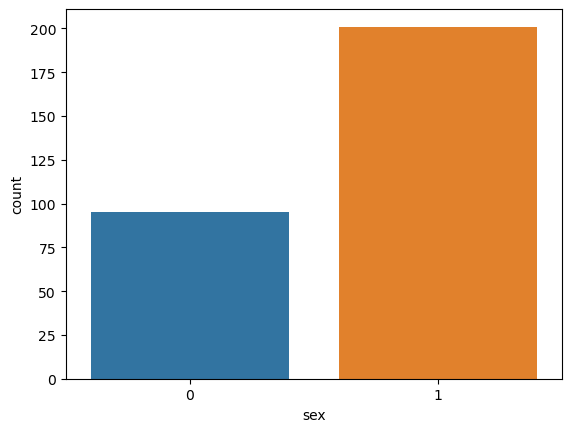

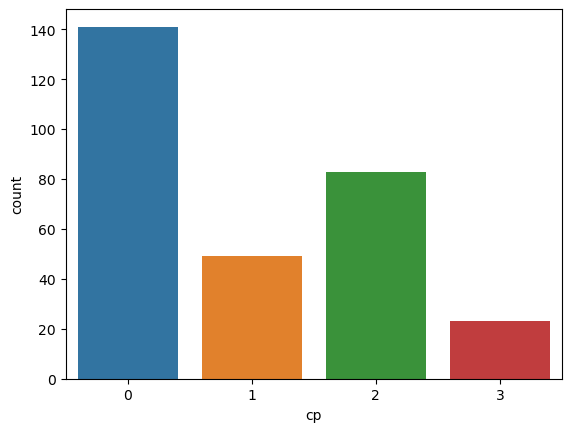

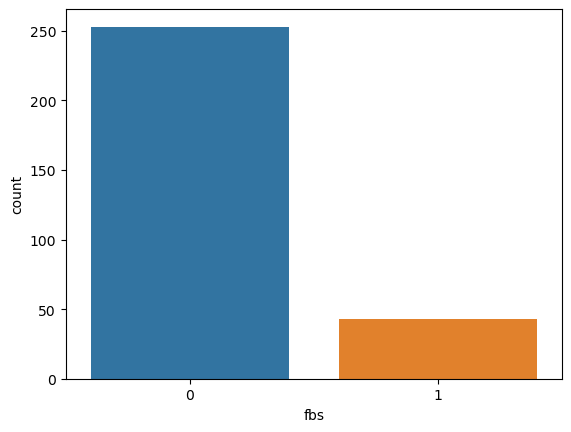

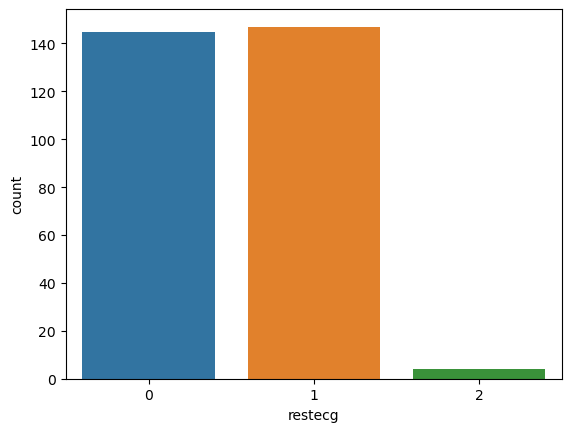

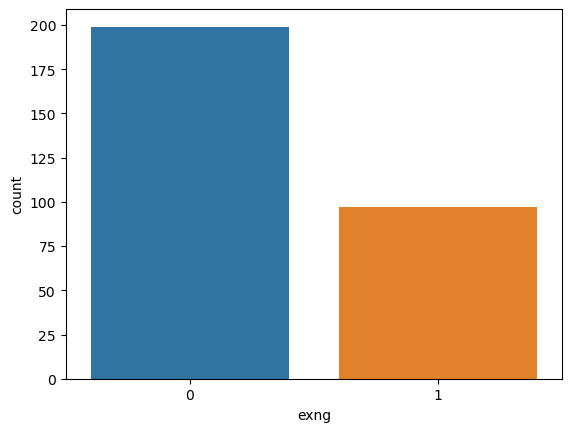

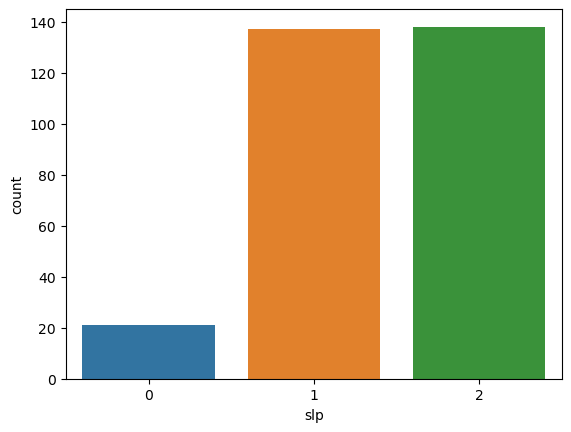

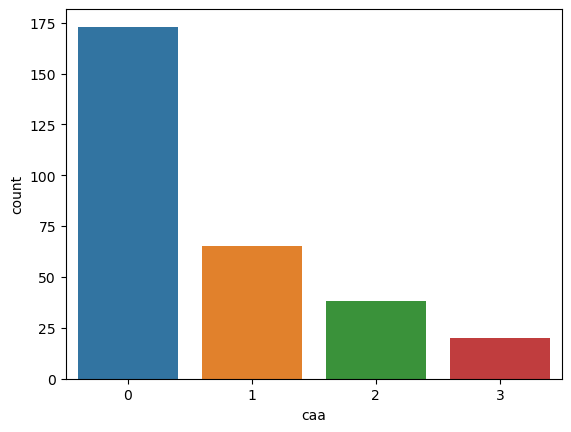

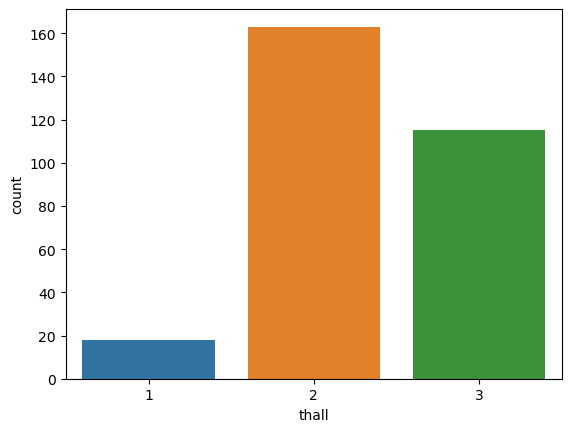

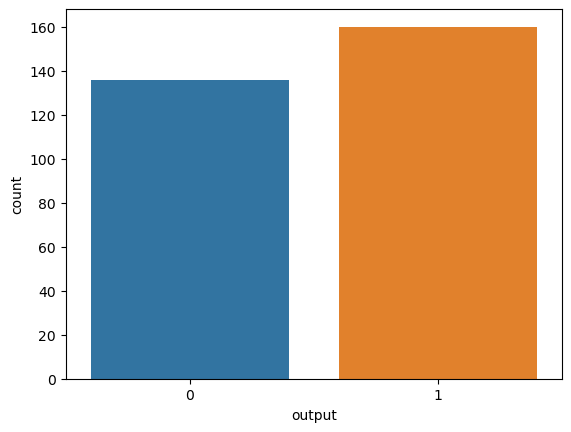

In [13]:
for i in cat:
    plt.figure()
    sns.countplot(x =i,data = heart_df)
    plt.show()

### Finding correlation between categorical data

In [14]:
# Feature Selection 
# Finding correlation for cat - cat data

for i in cat:
    print(i)
    matrix = pd.crosstab(heart_df[i],heart_df['output']).to_numpy()
    print(cramers_corrected_stat(matrix))

sex
0.2723595387818863
cp
0.4989641008565132
fbs
0.0
restecg
0.156829365591162
exng
0.4144909577107241
slp
0.3797704515657343
caa
0.4884654999890648
thall
0.5264498919776031
output
0.9931753156745466


### Finding coefficient of continuous data

In [15]:
# coeff of continuous

for i in con:
    print(i)
    lr = LogisticRegression()
    lr.fit(np.expand_dims(heart_df[i], axis =1), heart_df['output'])
    print(lr.score(np.expand_dims(heart_df[i],axis =1), heart_df['output']))

age
0.6216216216216216
trtbps
0.5777027027027027
chol
0.5304054054054054
thalachh
0.706081081081081
oldpeak
0.6858108108108109


### Finding the correlation of coefficient between continuous data

In [16]:
# Finding correlation coeff between continuous data
heart_df_con = heart_df.loc[:, ['age','trtbps', 'chol' ,'thalachh', 'oldpeak', 'output']]
corr = heart_df_con.corr()
display(corr)

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.288701,0.200920,-0.395989,0.199373,-0.225453
trtbps,0.288701,1.000000,0.126705,-0.051817,0.196793,-0.148922
chol,0.200920,0.126705,1.000000,-0.001947,0.042144,-0.076541
thalachh,-0.395989,-0.051817,-0.001947,1.000000,-0.346742,0.426655
oldpeak,0.199373,0.196793,0.042144,-0.346742,1.000000,-0.428804
output,-0.225453,-0.148922,-0.076541,0.426655,-0.428804,1.000000


In [17]:
heart_df_con.corr()['output'].sort_values()

oldpeak    -0.428804
age        -0.225453
trtbps     -0.148922
chol       -0.076541
thalachh    0.426655
output      1.000000
Name: output, dtype: float64

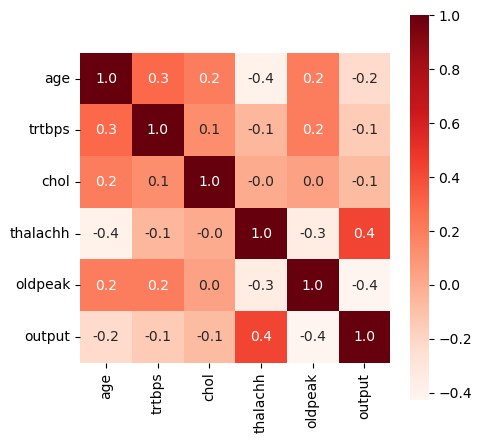

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap= 'Reds', annot = True, square = True, fmt= '.1f')
plt.show()

# 6.0 Model Selection

## 6.1 Feature selecting according to the correlation calculated
 
and also seperating target variable from the data

In [19]:
# Data Pre-processing

# select feature according corr coeff
X = heart_df.drop(['output', 'fbs'],axis =1)
y = heart_df['output']



## 6.2 Splitting the data using the train_test_split function

where random_state is 43 , test_size is 0.3

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 43, stratify= y)

## 6.3 Model Development

Making pipeline for most of the method for binary classification and storing it in a list

In [21]:
# Model Development

pipeline_mms_lr = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('logistic_regression', LogisticRegression())
])

pipeline_ss_lr = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

pipeline_gbc_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('gradient_boosting_class', GradientBoostingClassifier())
])

pipeline_gbc_mms = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('gradient_boosting_class', GradientBoostingClassifier())
])

pipeline_svc_mms = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('svc', SVC())
])


pipeline_svc_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('svc', SVC())
])

pipeline_rfc_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('rfc', RandomForestClassifier())
])
pipeline_rfc_mms = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('rfc', RandomForestClassifier())
])

pipeline_tree_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
])

In [22]:
# store pipeline in list

pipelines = [pipeline_ss_lr, pipeline_mms_lr,
            pipeline_gbc_ss, pipeline_gbc_mms,
            pipeline_svc_ss, pipeline_svc_mms,
            pipeline_rfc_ss, pipeline_rfc_mms]
            

# 7.0 Model Training

This can take some times as the data we using is very big

In [23]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# 8.0 Model evaluation

storing all pipeline score in a dictionary

In [24]:
# Model evaluation

pipe_dict= {}
best_score = 0

model_name = ['ss + logreg', 'mms + logreg',
            'ss + gb', 'mms + gb',
            'ss + svc', 'mms + svc',
            'ss + rfc', 'mms + rfc']

## 8.1 Fitting the data into all pipeline and display the best of all

This will take some time depending on the data size and computational power

In [25]:
# Fit the data

for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)

    pipe_dict[model_name[i]]= [accuracy_score(y_test,y_pred),
                                f1_score(y_test,y_pred, average= 'weighted')]
    
    if model.score(X_test , y_test) > best_score:
        best_score = model.score(X_test , y_test)
        best_pipe = model_name[i]

print("The best model for heart attact prediction is {} with the accuracy of {}".format(best_pipe, best_score))

The best model for heart attact prediction is ss + logreg with the accuracy of 0.8539325842696629


## 8.2 List of color scheme for a better graph

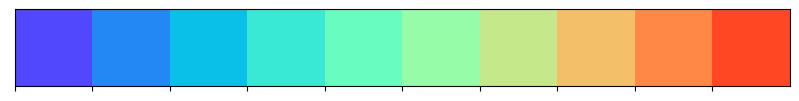

In [26]:
sns.palplot(sns.color_palette("rainbow", 10))

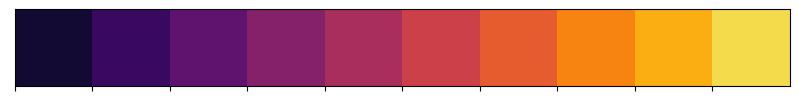

In [27]:
sns.palplot(sns.color_palette("inferno", 10))

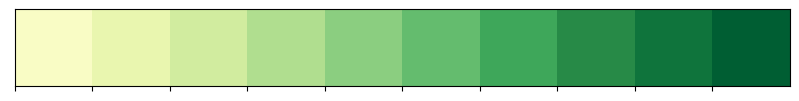

In [28]:
sns.palplot(sns.color_palette("YlGn", 10))

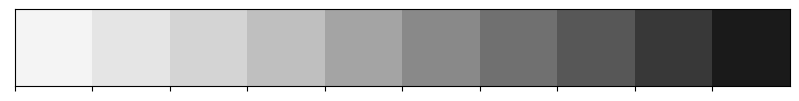

In [29]:
sns.palplot(sns.color_palette("Greys", 10))

## 8.3 Tabulate the accuracy and the F1 score of each pipeline

In [30]:
# Model 

model_comp_df = pd.DataFrame.from_dict(pipe_dict).T
model_comp_df.columns= ['Accuracy','F1 score']
model_comp_df = model_comp_df.sort_values('Accuracy', ascending= False)
model_comp_df.style.background_gradient(cmap = 'YlGn')

,Accuracy,F1 score
ss + logreg,0.853933,0.852806
mms + logreg,0.842697,0.840244
mms + svc,0.842697,0.841809
ss + rfc,0.842697,0.842697
ss + svc,0.831461,0.830160
mms + rfc,0.831461,0.831289
ss + gb,0.820225,0.819812
mms + gb,0.820225,0.819812


# 9.0 Tuning the hyperparams of the best pipeline 

which in time of running StandardScaler + LogisticRegression by using GridSearchCV 

This will take some time depending on the data size and computational power

The pipeline is as following:-

In [31]:
# pipeline_ss_lr = Pipeline([
#     ('standard_scaler', StandardScaler()),
#     ('logistic_regression', LogisticRegression())])

## 9.1 List of all the hyper_params of the pipeline

In [32]:
pipeline_ss_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standard_scaler', 'logistic_regression', 'standard_scaler__copy', 'standard_scaler__with_mean', 'standard_scaler__with_std', 'logistic_regression__C', 'logistic_regression__class_weight', 'logistic_regression__dual', 'logistic_regression__fit_intercept', 'logistic_regression__intercept_scaling', 'logistic_regression__l1_ratio', 'logistic_regression__max_iter', 'logistic_regression__multi_class', 'logistic_regression__n_jobs', 'logistic_regression__penalty', 'logistic_regression__random_state', 'logistic_regression__solver', 'logistic_regression__tol', 'logistic_regression__verbose', 'logistic_regression__warm_start'])

## 10.2 Choosing the hyper_params to tune

In [33]:
grid_param = [{
                'logistic_regression__C': [1.0, 1.5 ,2.5],
                'logistic_regression__class_weight': [None, 'balanced'],
                'logistic_regression__max_iter': [100, 500, 5000],
                'logistic_regression__random_state' : [1,13,42],
                'logistic_regression__solver' : ['lbfgs', 'liblinear', 'sag']
}]
grid_search = GridSearchCV(pipeline_ss_lr , grid_param, cv = 6 ,verbose= 1, n_jobs= -1)

grid = grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 162 candidates, totalling 972 fits


## 9.3 Best score and the hyper_params used for it

In [34]:
print(grid_search.score(X_test, y_test))

0.8539325842696629


In [35]:
display(grid.best_params_)

{'logistic_regression__C': 1.5,
 'logistic_regression__class_weight': None,
 'logistic_regression__max_iter': 100,
 'logistic_regression__random_state': 1,
 'logistic_regression__solver': 'lbfgs'}

## 9.4 Confusion matrix and classification report for the best pipeline

In [40]:
y_pred = grid.predict(X_test)

labels = ['No Heart Attack', 'Heart Attack']
cm =  confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names= labels)



In [37]:
print(cr)

                 precision    recall  f1-score   support

No Heart Attack       0.89      0.78      0.83        41
   Heart Attack       0.83      0.92      0.87        48

       accuracy                           0.85        89
      macro avg       0.86      0.85      0.85        89
   weighted avg       0.86      0.85      0.85        89



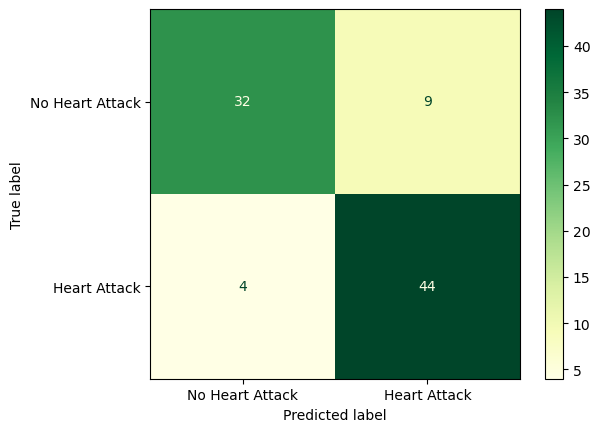

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= labels)
disp.plot(cmap= "YlGn")
plt.rcParams['figure.figsize']= [5,5]
plt.show()

# 10.0 Model Saving

In [39]:
## Model Saving

import os 
import pickle
MODEL_PATH = os.path.join(os.getcwd(),'model','model.pkl')
# TEST_PATH

with open(MODEL_PATH, 'wb')as file:
    pickle.dump(grid.best_estimator_, file)